<a href="https://colab.research.google.com/github/haviet12/Artificial_Inteligent/blob/main/VN_Foods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.optimizers import Adam
from keras.layers import LeakyReLU

from os import listdir
from numpy import asarray,save
from keras.utils import load_img, img_to_array
     

In [31]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [32]:
### thay doi ti le anh tu 0->255 thanh 0->1
train = ImageDataGenerator(rescale =1.0/255.0)
test = ImageDataGenerator(rescale=1.0/255.0)

In [33]:
train_data = train.flow_from_directory('/content/drive/MyDrive/MyPicture/VN_Foods/Train', target_size=(150,150), class_mode='categorical')
test_data = test.flow_from_directory('/content/drive/MyDrive/MyPicture/VN_Foods/Test', target_size=(150,150), class_mode='categorical')
     


Found 4500 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.


In [41]:
print('train_index :', train_data.class_indices)
print('test_index:', test_data.class_indices)

train_index : {'Banh cuon': 0, 'Banh mi': 1, 'Banh xeo': 2, 'Bun bo Hue': 3, 'Bun dau mam tom': 4, 'Chao long': 5, 'Com tam': 6, 'Goi cuon': 7, 'Mi quang': 8, 'Pho': 9}
test_index: {'Banh cuon': 0, 'Banh mi': 1, 'Banh xeo': 2, 'Bun bo Hue': 3, 'Bun dau mam tom': 4, 'Chao long': 5, 'Com tam': 6, 'Goi cuon': 7, 'Mi quang': 8, 'Pho': 9}


In [34]:

model= Sequential()
## lop CNN1
model.add(Conv2D(32, kernel_size=(3,3), activation='linear',input_shape=(150,150,3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2), padding='same'))
## lop CNN2
model.add(Conv2D(64,(3,3),activation='linear', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2), padding='same'))
## lop CNN3
model.add(Conv2D(128,(3,3),activation='linear', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2), padding='same'))

batch_size=128
epochs =30
classes =10

In [35]:
# chuyen du lieu tu CNN ve ANN ( 2 chieu ve 1 chieu)
model.add(Flatten())
##lop hidden1
model.add(Dense(256,activation='linear'))
model.add(LeakyReLU(alpha=0.1))
# lop outpu
model.add(Dense(classes, activation='softmax'))

In [36]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 150, 150, 32)      896       
                                                                 
 leaky_re_lu_13 (LeakyReLU)  (None, 150, 150, 32)      0         
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 75, 75, 64)        18496     
                                                                 
 leaky_re_lu_14 (LeakyReLU)  (None, 75, 75, 64)        0         
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 38, 38, 64)       0         
 g2D)                                                 

In [37]:
history=model.fit(train_data,epochs=30,batch_size=128,verbose=1, 
                  validation_data=test_data)

Epoch 1/30
141/141 [==============================] - 110s 777ms/step - loss: 2.3783 - accuracy: 0.1809 - val_loss: 2.0190 - val_accuracy: 0.3080
Epoch 2/30
141/141 [==============================] - 110s 782ms/step - loss: 1.9212 - accuracy: 0.3073 - val_loss: 1.9424 - val_accuracy: 0.2810
Epoch 3/30
141/141 [==============================] - 109s 776ms/step - loss: 1.6905 - accuracy: 0.4118 - val_loss: 1.8170 - val_accuracy: 0.3560
Epoch 4/30
141/141 [==============================] - 110s 781ms/step - loss: 1.3580 - accuracy: 0.5384 - val_loss: 1.8269 - val_accuracy: 0.3870
Epoch 5/30
141/141 [==============================] - 108s 768ms/step - loss: 0.7755 - accuracy: 0.7393 - val_loss: 2.0352 - val_accuracy: 0.4240
Epoch 6/30
141/141 [==============================] - 110s 779ms/step - loss: 0.2689 - accuracy: 0.9160 - val_loss: 2.6838 - val_accuracy: 0.3930
Epoch 7/30
141/141 [==============================] - 109s 777ms/step - loss: 0.0541 - accuracy: 0.9891 - val_loss: 3.2743 -

In [38]:
value=model.evaluate(train_data,verbose=0)
print('loss', value[0])
print('accuracy', value[1])

loss 0.0011126610916107893
accuracy 0.9997777938842773


<ipython-input-40-1135c77880a8>:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, accuracy, 'bo', label='Training accuracy', color='green')


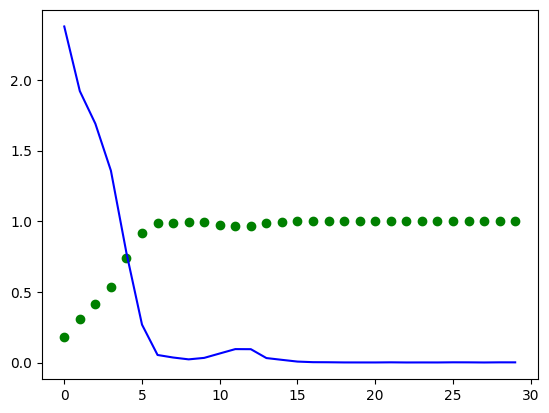

In [40]:
model.save('/content/drive/MyDrive/MyPicture/VN_Foods_Data/model_food.h5')
accuracy =history.history['accuracy']
loss = history.history['loss']
epochs=range(len(accuracy))

import matplotlib.pyplot as plt
plt.plot(epochs, accuracy, 'bo', label='Training accuracy', color='green')
plt.plot(epochs,loss , 'b', label ='Training loss')
plt.show()

1/1 [==============================] - 0s 20ms/step
Predicted:  Bun dau mam tom


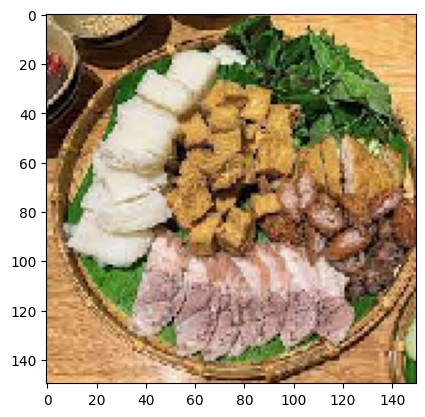

In [45]:
name_foods=['Banh cuon', 'Banh mi','Banh xeo','Bun bo Hue','Bun dau mam tom','Chao long','Com tam','Goi cuon','Mi quang','Pho']
filePath = '/content/drive/MyDrive/MyPicture/VN_Foods/bun_dau.jpg'
testImage = load_img(filePath, color_mode = 'rgb', target_size=(150,150))
arrayImage = img_to_array(testImage).reshape(1,150,150,3)/255
pred = int(np.argmax(model.predict(arrayImage)))
print("Predicted: ", name_foods[pred])
plt.imshow(testImage)
     

1/1 [==============================] - 0s 18ms/step
Predicted:  Banh mi


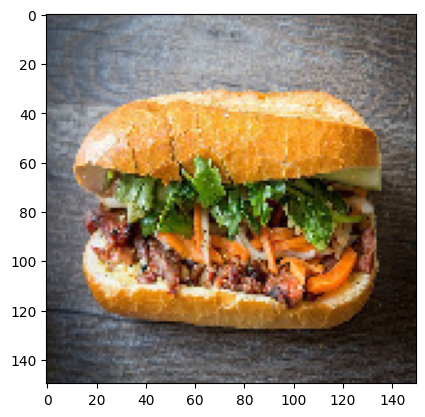

In [46]:
name_foods=['Banh cuon', 'Banh mi','Banh xeo','Bun bo Hue','Bun dau mam tom','Chao long','Com tam','Goi cuon','Mi quang','Pho']
filePath = '/content/drive/MyDrive/MyPicture/VN_Foods/banh_mi.jpg'
testImage = load_img(filePath, color_mode = 'rgb', target_size=(150,150))
arrayImage = img_to_array(testImage).reshape(1,150,150,3)/255
pred = int(np.argmax(model.predict(arrayImage)))
print("Predicted: ", name_foods[pred])
plt.imshow(testImage)

1/1 [==============================] - 0s 19ms/step
Predicted:  Bun bo Hue


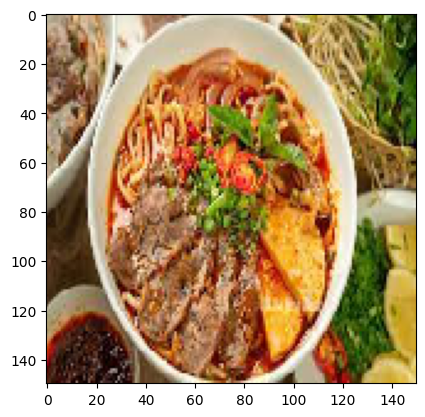

In [47]:
name_foods=['Banh cuon', 'Banh mi','Banh xeo','Bun bo Hue','Bun dau mam tom','Chao long','Com tam','Goi cuon','Mi quang','Pho']
filePath = '/content/drive/MyDrive/MyPicture/VN_Foods/bu_bo.jfif'
testImage = load_img(filePath, color_mode = 'rgb', target_size=(150,150))
arrayImage = img_to_array(testImage).reshape(1,150,150,3)/255
pred = int(np.argmax(model.predict(arrayImage)))
print("Predicted: ", name_foods[pred])
plt.imshow(testImage)

1/1 [==============================] - 0s 18ms/step
Predicted:  Bun dau mam tom


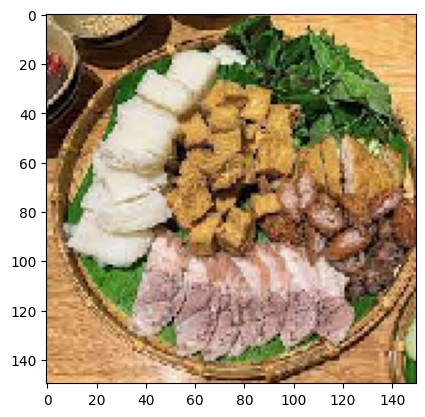

1/1 [==============================] - 0s 19ms/step
Predicted:  Bun bo Hue


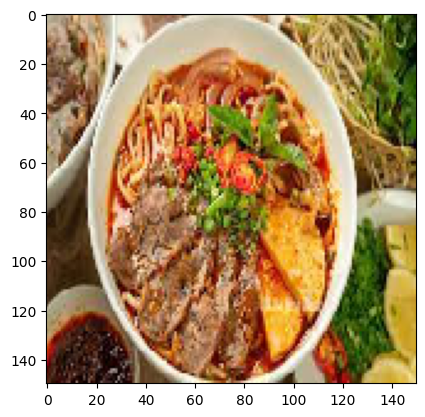

1/1 [==============================] - 0s 18ms/step
Predicted:  Banh mi


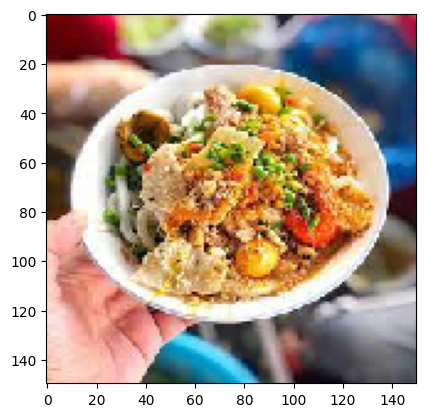

1/1 [==============================] - 0s 18ms/step
Predicted:  Banh cuon


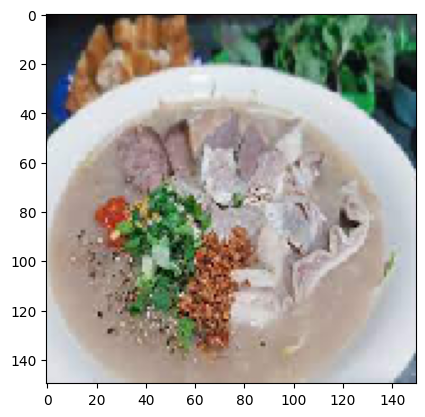

1/1 [==============================] - 0s 18ms/step
Predicted:  Com tam


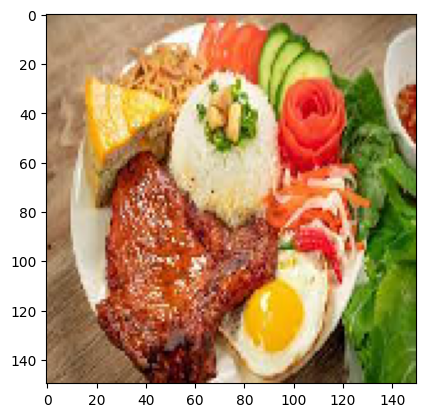

1/1 [==============================] - 0s 17ms/step
Predicted:  Chao long


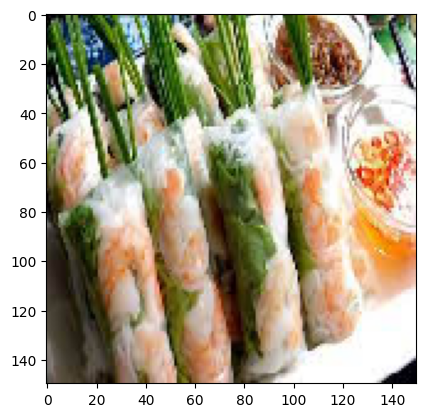

1/1 [==============================] - 0s 22ms/step
Predicted:  Banh mi


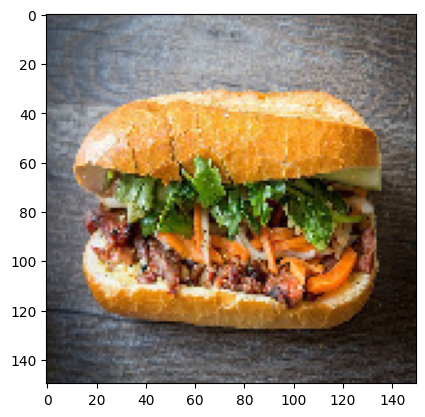

1/1 [==============================] - 0s 24ms/step
Predicted:  Banh xeo


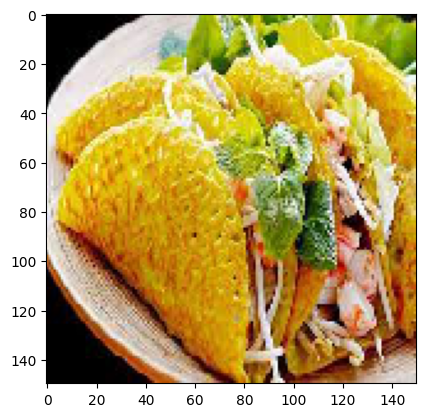

1/1 [==============================] - 0s 25ms/step
Predicted:  Pho


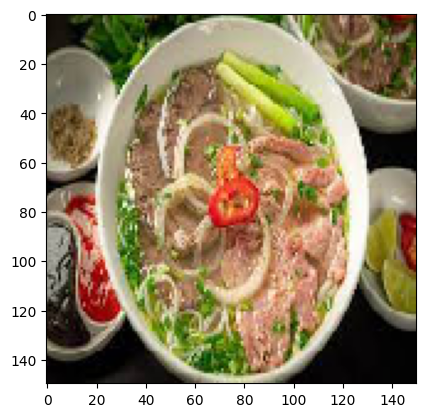

1/1 [==============================] - 0s 29ms/step
Predicted:  Com tam


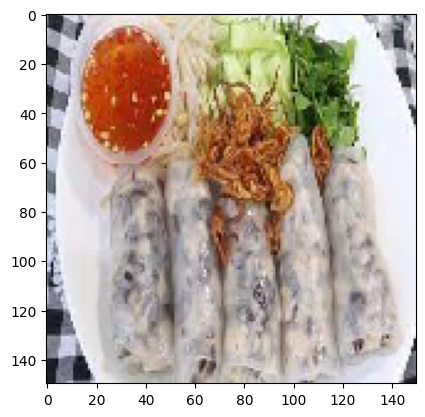

In [59]:
from matplotlib.image import imread

name_foods=['Banh cuon', 'Banh mi','Banh xeo','Bun bo Hue','Bun dau mam tom','Chao long','Com tam','Goi cuon','Mi quang','Pho']
folder ='/content/drive/MyDrive/MyPicture/VN_Foods/check_accur/'
for i in os.listdir(folder):
  test_img=load_img(folder+'/'+ i,target_size=(150,150), color_mode = 'rgb')
  plt.imshow(test_img)
 
  # testImage = load_img(filename, color_mode = 'rgb', target_size=(150,150))
  arrayImage = img_to_array(test_img).reshape(1,150,150,3)/255
  pred = int(np.argmax(model.predict(arrayImage)))
  print("Predicted: ", name_foods[pred])
  plt.show()
 

